# Exploratory Data Analysis(EDA) 
## Using python and applying Logistic Regression
We'll predict a classification survival and decreased.
Let's begin our understanding of implimenting Logistic Regression in python for classification.
we'll use a "semi-cleaned" version of the titanic dataset.

### Importing liberary


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### The data
reading the titani_dataset

In [78]:
train=pd.read_csv('titanic_train.csv')

In [79]:
train.head()

Unnamed: 0  PassengerId  Survived  Pclass  \
0           0            1         0       3   
1           1            2         1       1   
2           2            3         1       3   
3           3            4         1       1   
4           4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S


### Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

### Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

In [80]:
train.isnull()

Unnamed: 0  PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  \
0         False        False     False   False  False  False  False  False   
1         False        False     False   False  False  False  False  False   
2         False        False     False   False  False  False  False  False   
3         False        False     False   False  False  False  False  False   
4         False        False     False   False  False  False  False  False   
..          ...          ...       ...     ...    ...    ...    ...    ...   
886       False        False     False   False  False  False  False  False   
887       False        False     False   False  False  False  False  False   
888       False        False     False   False  False  False   True  False   
889       False        False     False   False  False  False  False  False   
890       False        False     False   False  False  False  False  False   

     Parch  Ticket   Fare  Cabin  Embarked  
0    False   False  False   True     False  
1    False   False  False  False     False  
2    False   False  False   True     False  
3    False   False  False  False     False  
4    False   False  False   True     False  
..     ...     ...    ...    ...       ...  
886  False   False  False   True     False  
887  False   False  False  False     False  
888  False   False  False   True     False  
889  False   False  False  False     False  
890  False   False  False   True     False  

[891 rows x 13 columns]

<AxesSubplot:>

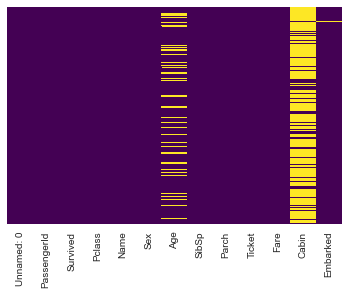

In [81]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

this shows that which columns we have the null (NaN) values


Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.


<AxesSubplot:xlabel='Survived', ylabel='count'>

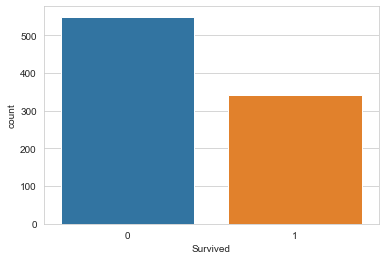

In [82]:
sns.set_style('whitegrid')
# sns.set_style('dark')

sns.countplot(x='Survived',data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

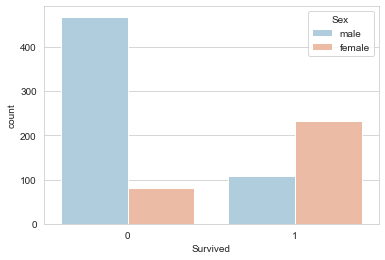

In [83]:
# number of male and female survived
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

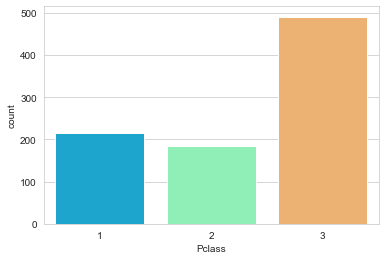

In [84]:
# passanger according to there classes
sns.countplot(x='Pclass',data=train,palette='rainbow')

<AxesSubplot:xlabel='Survived', ylabel='count'>

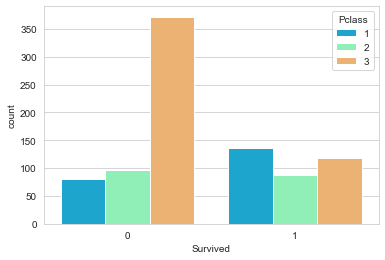

In [85]:
# Passanger survived according to the passinger_class data
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

C:\Users\GAURAV\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

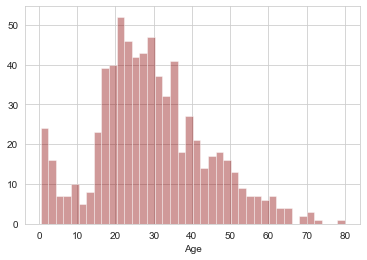

In [86]:
# distribution of age
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)


<AxesSubplot:>

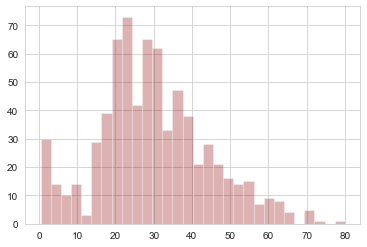

In [87]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)


<AxesSubplot:xlabel='SibSp', ylabel='count'>

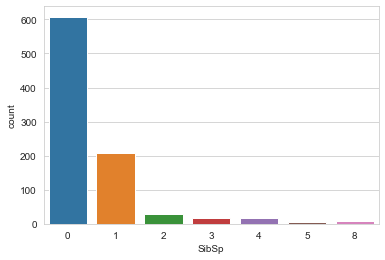

In [88]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

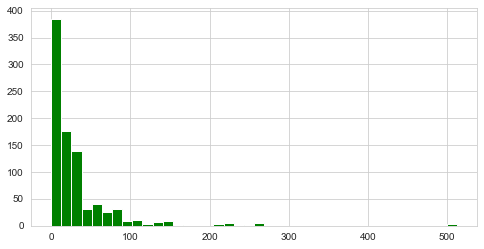

In [89]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

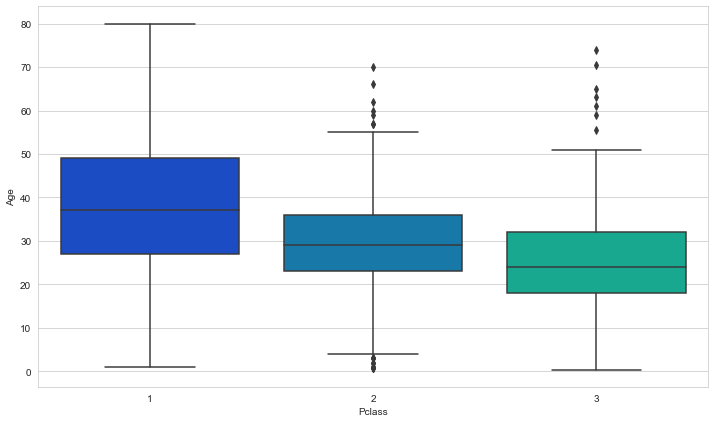

In [90]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [91]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [92]:
# Now apply the function!

train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

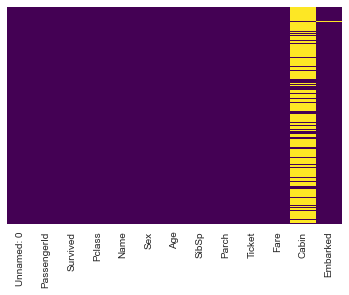

In [93]:
# now let's check heat map again!
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Cabin have many null value so we are going to frop this table


In [94]:
train.drop('Cabin',axis=1,inplace=True)

In [95]:
train.head()

Unnamed: 0  PassengerId  Survived  Pclass  \
0           0            1         0       3   
1           1            2         1       1   
2           2            3         1       3   
3           3            4         1       1   
4           4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

<AxesSubplot:>

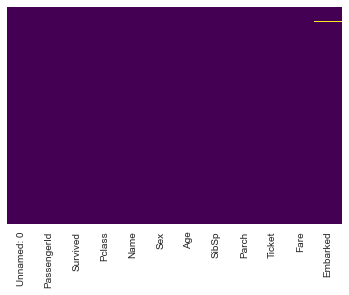

In [96]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [97]:
train.dropna(inplace=True)

### Converting Catogrical feature
We'll need to convert categorical feature to dummy variable using pandas Otherwise our ML algorithm won't be abel to directly take in those feature as inputs.

In [98]:
train.head()

Unnamed: 0  PassengerId  Survived  Pclass  \
0           0            1         0       3   
1           1            2         1       1   
2           2            3         1       3   
3           3            4         1       1   
4           4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [99]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
Unnamed: 0     889 non-null int64
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 90.3+ KB


In [100]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [103]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)



In [104]:
sex

male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[889 rows x 1 columns]

In [105]:
embark

Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[889 rows x 2 columns]

In [106]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train.head()


Unnamed: 0  PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0           0            1         0       3  22.0      1      0   7.2500
1           1            2         1       1  38.0      1      0  71.2833
2           2            3         1       3  26.0      0      0   7.9250
3           3            4         1       1  35.0      1      0  53.1000
4           4            5         0       3  35.0      0      0   8.0500

In [107]:
train = pd.concat([train,sex,embark],axis=1)
train.head()


Unnamed: 0  PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  \
0           0            1         0       3  22.0      1      0   7.2500   
1           1            2         1       1  38.0      1      0  71.2833   
2           2            3         1       3  26.0      0      0   7.9250   
3           3            4         1       1  35.0      1      0  53.1000   
4           4            5         0       3  35.0      0      0   8.0500   

   male  Q  S  
0     1  0  1  
1     0  0  0  
2     0  0  1  
3     0  0  1  
4     1  0  1

Great! Our data is ready for our model!

### Building a Logistic Regression model
Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

### Train Test Split

In [115]:
train.drop('Survived',axis=1).head() # this is our input dataset
# droping because it is a dependent feature 
# Basically train['Survived'] is our output dataset

Unnamed: 0  PassengerId  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0           0            1       3  22.0      1      0   7.2500     1  0  1
1           1            2       1  38.0      1      0  71.2833     0  0  0
2           2            3       3  26.0      0      0   7.9250     0  0  1
3           3            4       1  35.0      1      0  53.1000     0  0  1
4           4            5       3  35.0      0      0   8.0500     1  0  1

In [116]:
# OUTPUT DATASET
train['Survived'].head()


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [117]:
from sklearn.model_selection import train_test_split


In [118]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)
# test size will be 30%

### Training and Predicting

In [119]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression


In [33]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
predictions = logmodel.predict(X_test)


In [35]:
from sklearn.metrics import confusion_matrix


In [36]:
accuracy=confusion_matrix(y_test,predictions)


In [37]:
accuracy


array([[149,  14],
       [ 35,  69]], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score


In [39]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8164794007490637

In [40]:
predictions


array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

Let's move on to evaluate our model!

### Evaluation
We can check precision,recall,f1-score using classification report!

In [41]:
from sklearn.metrics import classification_report


In [42]:
print(classification_report(y_test,predictions))



             precision    recall  f1-score   support

          0       0.81      0.91      0.86       163
          1       0.83      0.66      0.74       104

avg / total       0.82      0.82      0.81       267



Not so bad! You might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

- Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
- Maybe the Cabin letter could be a feature
- Is there any info you can get from the ticket?